# Experimenting with EEMD

`ensemble empirical mode decomposition`

### Impots

In [1]:
from matplotlib import pyplot as plt
import numpy as np
import pandas as pd
import matplotlib.dates as mdates
import math
import utils

### Loading data

In [2]:
df = utils.load_mavir_data()

### Format data

In [7]:
# standardize power - this way residue will be smaller
df['Power'] = utils.standardize(df['Power'])

# choose a sample to decompose
sample = utils.sample(df, 100, start_idx=0)

0     2.716767
1     2.664872
2     2.537265
3     2.632288
4     2.635154
        ...   
95   -0.287174
96   -0.300845
97   -0.257947
98   -0.283848
99   -0.660663
Name: Power, Length: 100, dtype: float64

### Calculating IMFs

`intrinsic mode function`

In [11]:
imfs, residue = utils.apply_eemd(sample['Power'].to_numpy(), spline_kind='cubic')
# akima spline produces fast and acurate results for large datasets
# cubic spline is good for small datasets

### Show graphs

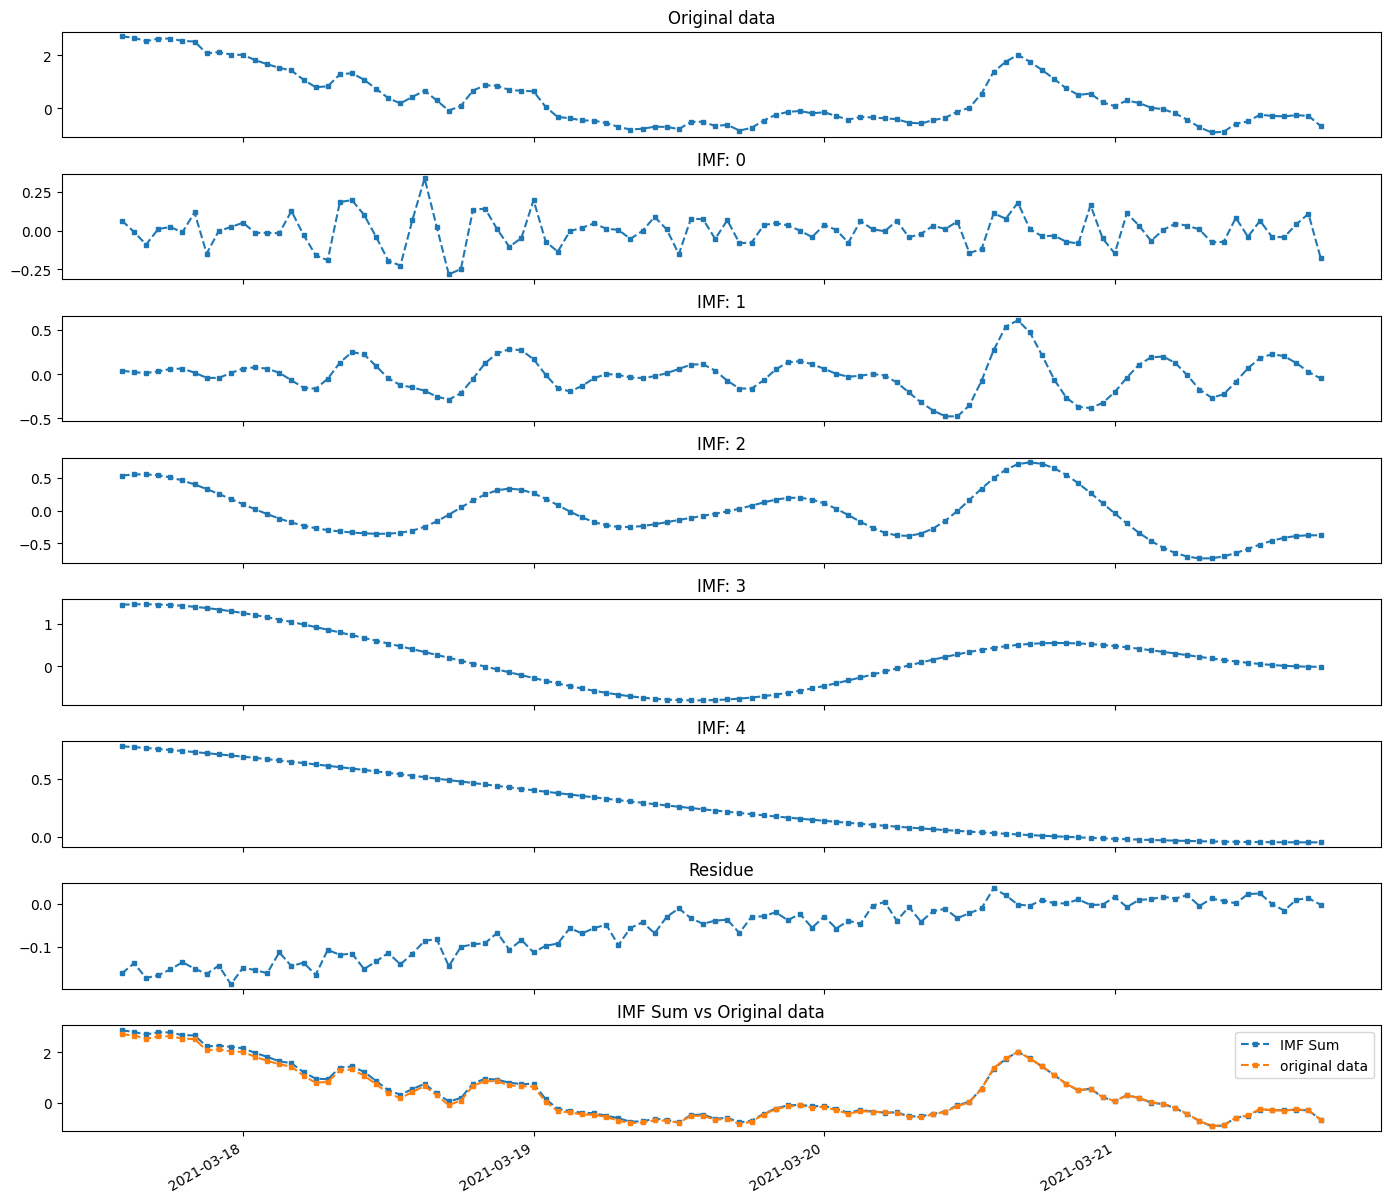

In [12]:
plt.rcParams['figure.figsize'] = [14, 14]

imf_count = len(imfs)
fig, axs = plt.subplots(imf_count + 3)
fig.tight_layout()

axs[0].xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m-%d'))
axs[0].xaxis.set_major_locator(mdates.DayLocator())
axs[0].plot(sample['Time'], sample['Power'], marker='s', linestyle='--', markersize=3)
axs[0].set_title('Original data')

for idx, (ax, imf) in enumerate(zip(axs[1:-1], imfs)):
    ax.xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m-%d'))
    ax.xaxis.set_major_locator(mdates.DayLocator())
    ax.plot(sample['Time'], imf, marker='s', linestyle='--', markersize=3)
    ax.set_title(f'IMF: {idx}')

axs[-2].xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m-%d'))
axs[-2].xaxis.set_major_locator(mdates.DayLocator())
axs[-2].plot(sample['Time'], residue, marker='s', linestyle='--', markersize=3)
axs[-2].set_title('Residue')

axs[-1].xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m-%d'))
axs[-1].xaxis.set_major_locator(mdates.DayLocator())
axs[-1].plot(sample['Time'], np.sum(imfs, axis=0), marker='s', linestyle='--', markersize=3, label='IMF Sum')
axs[-1].plot(sample['Time'], sample['Power'], marker='s', linestyle='--', markersize=3, label='original data')
axs[-1].set_title('IMF Sum vs Original data')
axs[-1].legend()

fig.autofmt_xdate()
plt.show()

### Calculate and display correlation matrix

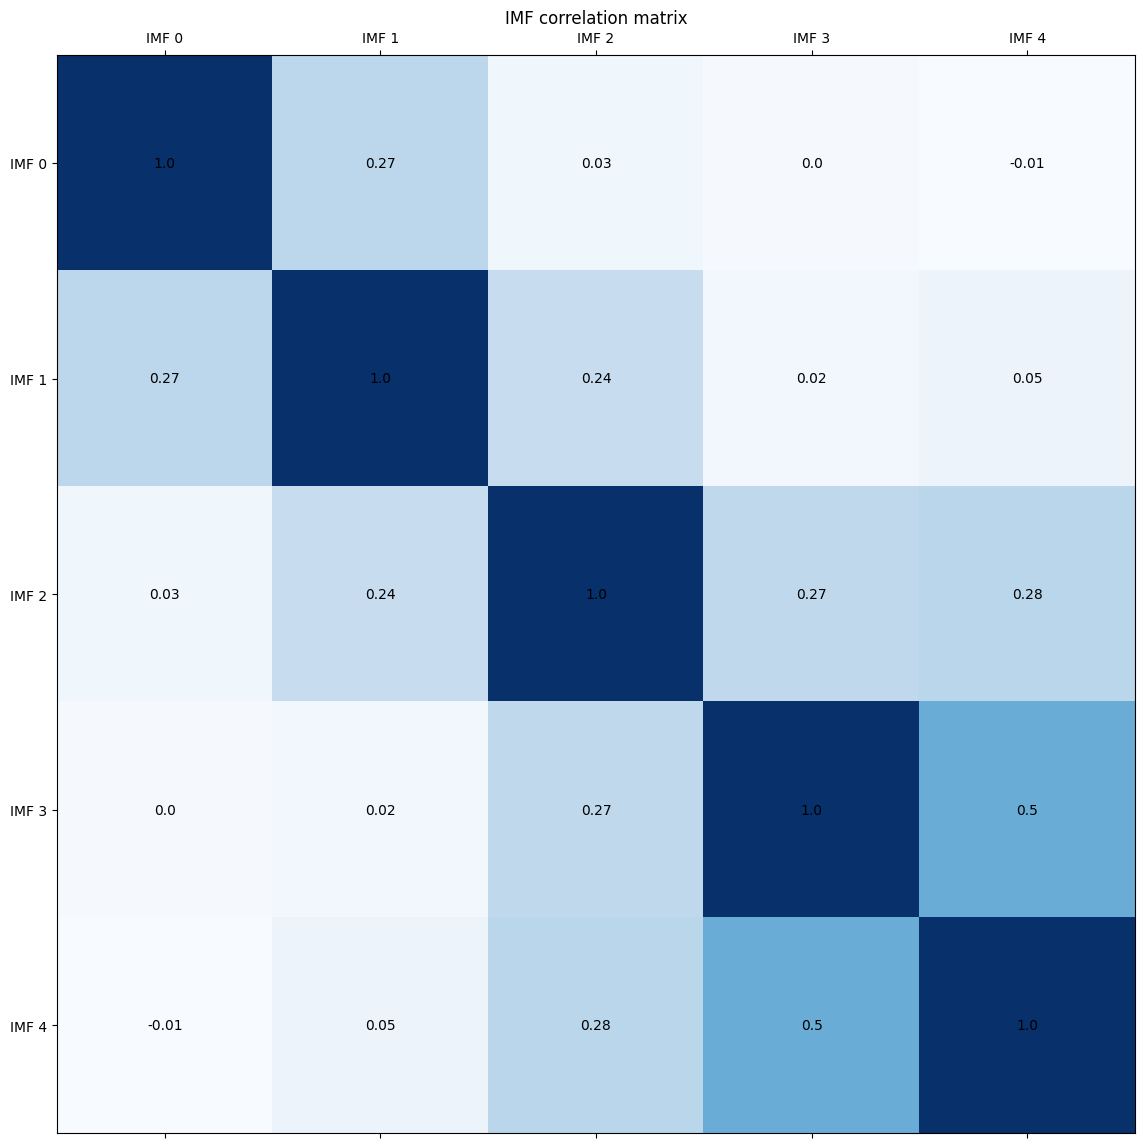

In [13]:
corr = pd.DataFrame(imfs.T, columns=[f'IMF{i}' for i in range(imfs.shape[0])]).corr().to_numpy()

fig, ax = plt.subplots()

ax.matshow(corr, cmap=plt.cm.Blues)

for i in range(imfs.shape[0]):
    for j in range(imfs.shape[0]):
        c = corr[j,i]
        ax.text(i, j, str(round(c, 2)), va='center', ha='center')

ax.set_yticks(np.arange(imfs.shape[0]))
ax.set_xticks(np.arange(imfs.shape[0]))
ax.set_yticklabels([f'IMF {i}' for i in range(imfs.shape[0])])
ax.set_xticklabels([f'IMF {i}' for i in range(imfs.shape[0])])

ax.set_title('IMF correlation matrix')
plt.show()